In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data =pd.read_csv("drug_classification.csv")

EDA

In [ ]:
data.shape

(400000, 6)

In [ ]:
data.head()

,patient_id,name,gender,age,race,side_effects
0,48683,Justin Hopkins,female,Oct-20,Hispanic,No Side Effects
1,101343,Heather Murphy,male,40-50,Asian,Mild Side Effects
2,66360,Michael Burns,female,50-60,White,Extremely Severe Side Effects
3,244456,Amy Elliott,female,50-60,White,Moderate Side Effects
4,7720,Alexander Johnson,male,20-30,Black,Moderate Side Effects


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   patient_id    400000 non-null  int64 
 1   name          400000 non-null  object
 2   gender        400000 non-null  object
 3   age           400000 non-null  object
 4   race          400000 non-null  object
 5   side_effects  400000 non-null  object
dtypes: int64(1), object(5)
memory usage: 18.3+ MB


In [ ]:
data.dtypes.value_counts()

object    5
int64     1
dtype: int64

In [ ]:
data.isnull().sum()

patient_id      0
name            0
gender          0
age             0
race            0
side_effects    0
dtype: int64

In [ ]:
data.isna().sum()

patient_id      0
name            0
gender          0
age             0
race            0
side_effects    0
dtype: int64

In [ ]:
data.dtypes

patient_id       int64
name            object
gender          object
age             object
race            object
side_effects    object
dtype: object

Data Cleaning


In [ ]:
data_clone=data
data = data.drop(['patient_id','name'], axis = 1)
data.head()

,gender,age,race,side_effects
0,female,Oct-20,Hispanic,No Side Effects
1,male,40-50,Asian,Mild Side Effects
2,female,50-60,White,Extremely Severe Side Effects
3,female,50-60,White,Moderate Side Effects
4,male,20-30,Black,Moderate Side Effects


In [ ]:
data.isna().sum()

gender          0
age             0
race            0
side_effects    0
dtype: int64

In [ ]:
data.duplicated().sum()

399600

In [ ]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data

""
0
1
2
3
4
...
399995
399996
399997
399998


In [ ]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,gender,age,race,side_effects
0,female,Oct-20,Hispanic,No Side Effects
1,male,40-50,Asian,Mild Side Effects
2,female,50-60,White,Extremely Severe Side Effects
3,female,50-60,White,Moderate Side Effects
4,male,20-30,Black,Moderate Side Effects
...,...,...,...,...
399995,female,60-70,Black,Extremely Severe Side Effects
399996,female,70-80,Hispanic,No Side Effects
399997,female,80-90,Asian,No Side Effects
399998,female,70-80,White,Moderate Side Effects


Univariate Analysis

<Axes: ylabel='race'>

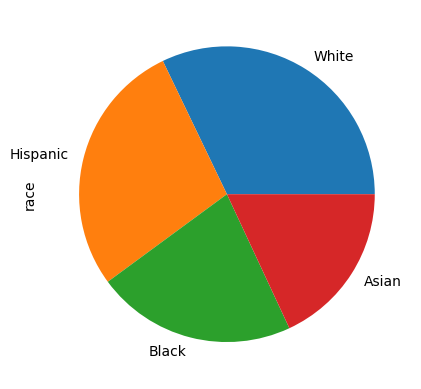

In [ ]:
data['race'].value_counts().plot(kind="pie")

By analysing the graph,people belongs to  white species is more.


In [ ]:
data['race'].value_counts()

White       128541
Hispanic    111821
Black        87410
Asian        72228
Name: race, dtype: int64

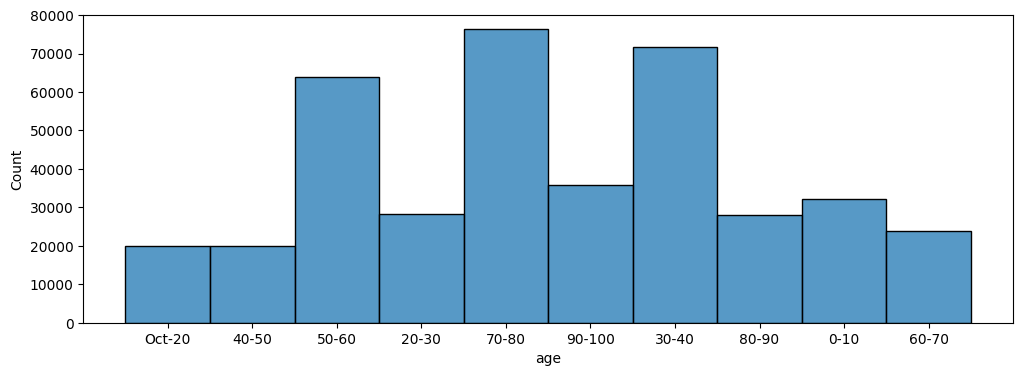

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data['age'],bins=50);

By analysing the graph,people belomngs to age group 70-80 is more in number

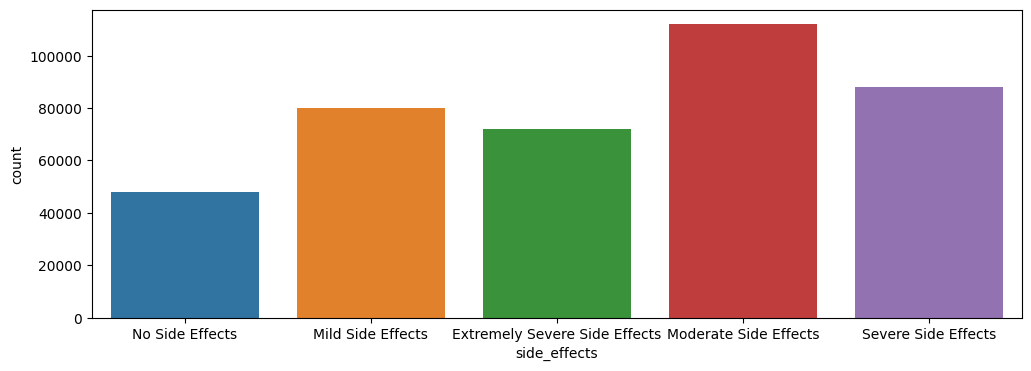

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='side_effects',data=data);

By analysing this graph,people having no side effects is less in number and people with moderate side effects is high.


Bi Variate Analysis

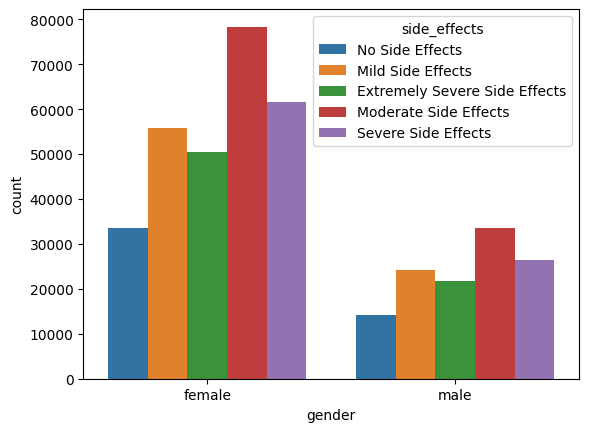

In [ ]:
sns.countplot(data,x="gender",hue="side_effects")
plt.show()

From the above graph it is clear that number of male is less compared to number of feamale in case of drug with side effects and without side effects.

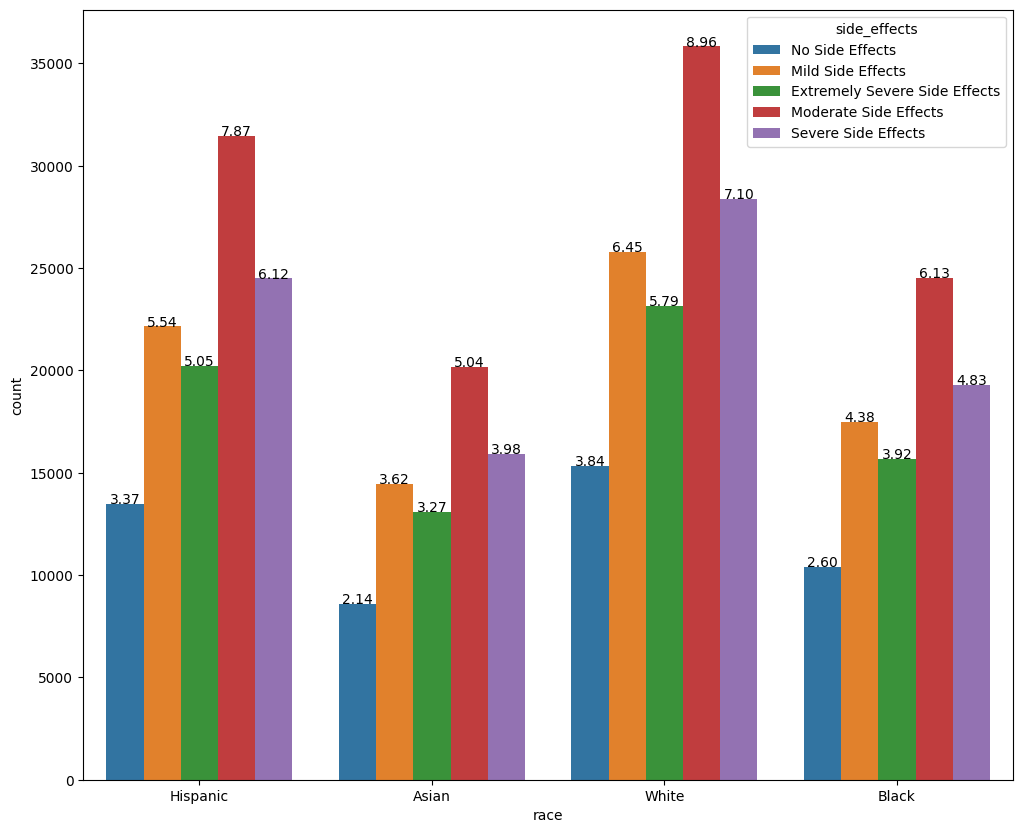

In [ ]:
# check for side_effects with race in the data using countplot
plt.figure(figsize=(12,10))
total = float(len(data["side_effects"]) )

ax = sns.countplot(x="race", hue="side_effects", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

From the above graph it is clear that people with no side effects is less in Asian race,people with moderate side effect and severe is high in white race

In [ ]:
data.nunique()

gender           2
age             10
race             4
side_effects     5
dtype: int64

In [ ]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of         gender     age      race                   side_effects
0       female  Oct-20  Hispanic                No Side Effects
1         male   40-50     Asian              Mild Side Effects
2       female   50-60     White  Extremely Severe Side Effects
3       female   50-60     White          Moderate Side Effects
4         male   20-30     Black          Moderate Side Effects
...        ...     ...       ...                            ...
399995  female   60-70     Black  Extremely Severe Side Effects
399996  female   70-80  Hispanic                No Side Effects
399997  female   80-90     Asian                No Side Effects
399998  female   70-80     White          Moderate Side Effects
399999  female   50-60     Black  Extremely Severe Side Effects

[400000 rows x 4 columns]>

Data Preprocessing

Label Encoding

In [ ]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,gender,age,race,side_effects
0,female,Oct-20,Hispanic,No Side Effects
1,male,40-50,Asian,Mild Side Effects
2,female,50-60,White,Extremely Severe Side Effects
3,female,50-60,White,Moderate Side Effects
4,male,20-30,Black,Moderate Side Effects
...,...,...,...,...
399995,female,60-70,Black,Extremely Severe Side Effects
399996,female,70-80,Hispanic,No Side Effects
399997,female,80-90,Asian,No Side Effects
399998,female,70-80,White,Moderate Side Effects


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()
data['side_effects']=le.fit_transform(data['side_effects'])
data['age']=le1.fit_transform(data['age'])
data['race']=le1.fit_transform(data['race'])
data['gender']=le1.fit_transform(data['gender'])

In [ ]:
data

,gender,age,race,side_effects
0,0,9,2,3
1,1,3,0,1
2,0,4,3,0
3,0,4,3,2
4,1,1,1,2
...,...,...,...,...
399995,0,5,1,0
399996,0,6,2,3
399997,0,7,0,3
399998,0,6,3,2


Multivariate Analysis

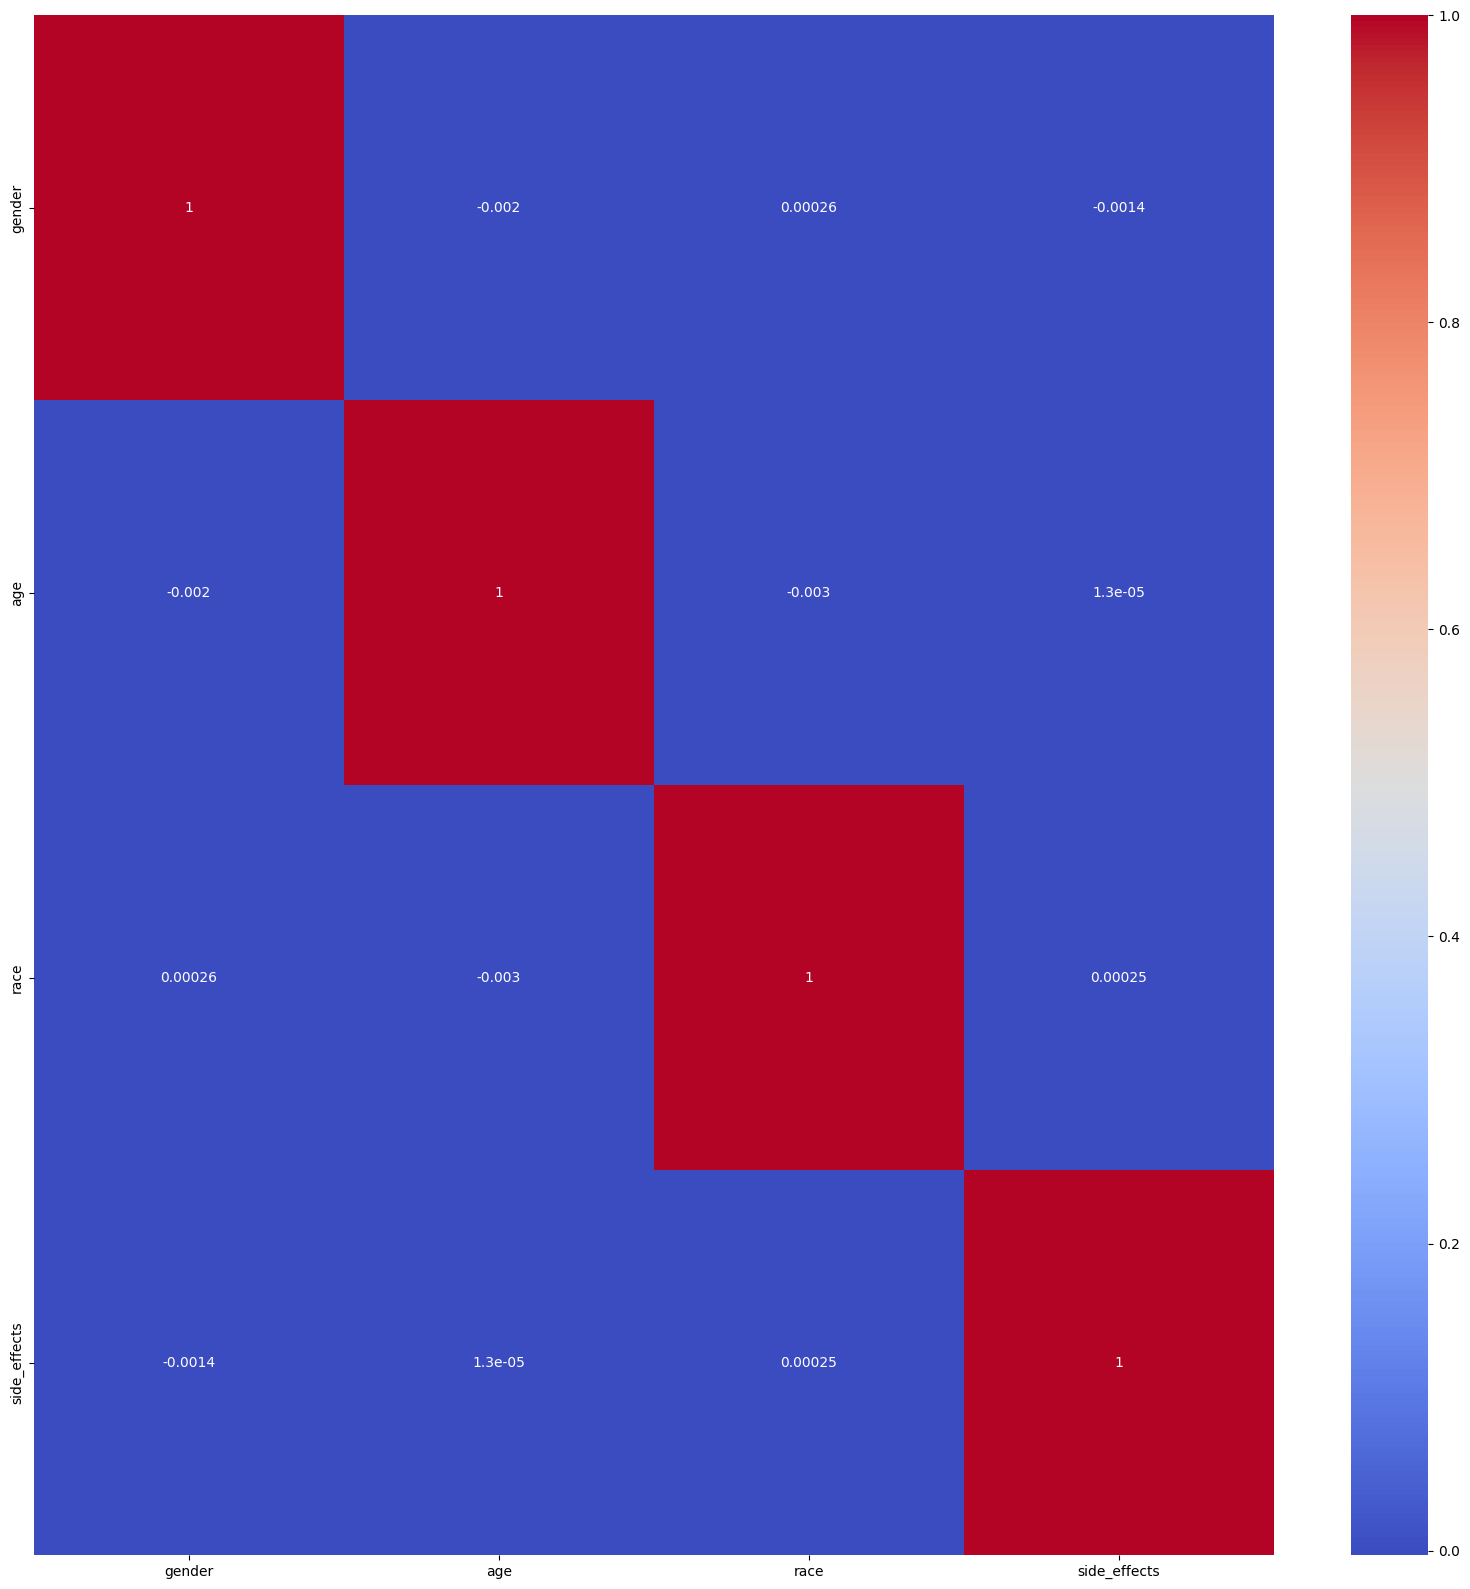

In [ ]:
correlation=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

Managing outliers and missing values

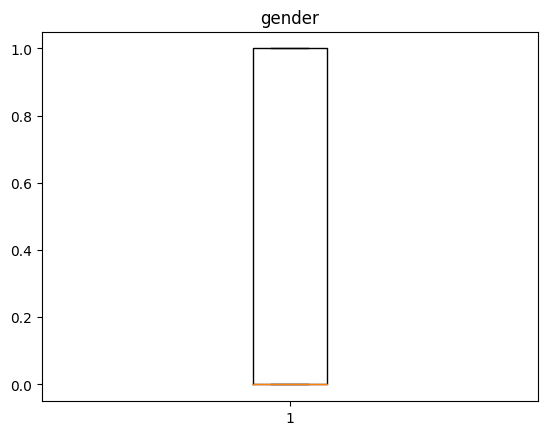

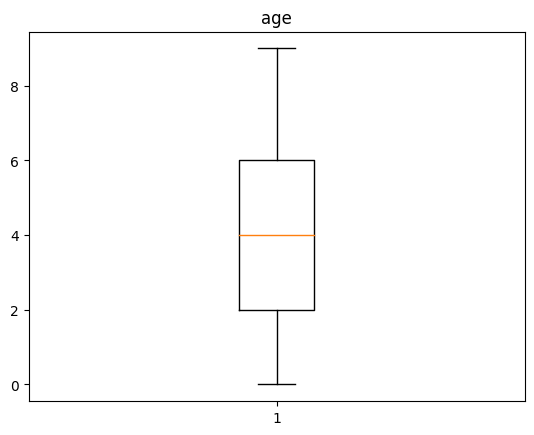

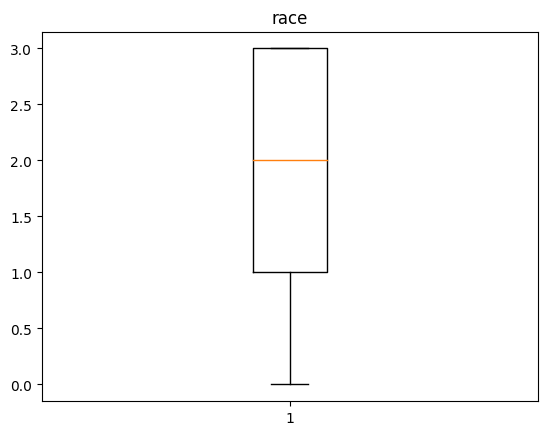

In [ ]:
for i in ['gender','age','race']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

Since no outliers found no need to handle that

Scaling

In [ ]:
from  sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler ()

data['age']=scale.fit_transform(data[['age']])


In [ ]:
data['race']=scale.fit_transform(data[['race']])
data['gender']=scale.fit_transform(data[['gender']])
#data['side_effects']=scale.fit_transform(data[['side_effects']])


In [ ]:
data

,gender,age,race,side_effects
0,0.0,1.000000,0.666667,3
1,1.0,0.333333,0.000000,1
2,0.0,0.444444,1.000000,0
3,0.0,0.444444,1.000000,2
4,1.0,0.111111,0.333333,2
...,...,...,...,...
399995,0.0,0.555556,0.333333,0
399996,0.0,0.666667,0.666667,3
399997,0.0,0.777778,0.000000,3
399998,0.0,0.666667,1.000000,2


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X=data.drop(['side_effects'],axis=1)
calc_vif(X)
#print(vif)

,variables,VIF
0,gender,1.338246
1,age,2.214252
2,race,2.201848


Model Building

In [ ]:
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
#from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  AdaBoostClassifier



from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [ ]:
X = data.drop('side_effects',axis=1)
Y = data['side_effects']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
models={
    "KNeighbours classifier": KNeighborsClassifier(30),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "AdaBoost Classifier":AdaBoostClassifier(),
    "XGB Classifier":XGBClassifier(),
    'GaussianNB':GaussianNB(),


}

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(Y_test,y_pred)
print("accuracy is",accuracy_score(Y_test,y_pred))
print("confusion matrix is",confusion_matrix(Y_test,y_pred))

accuracy is 0.2123
confusion matrix is [[4858 1928 3824 1096 2616]
 [5257 2254 4205 1230 2976]
 [7571 3122 5906 1769 4148]
 [3256 1310 2504  723 1759]
 [5956 2453 4648 1388 3243]]


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(X_train,Y_train)
y_decision=decision.predict(X_test)

print("accuracy is",accuracy_score(Y_test,y_decision))
print("confusion matrix is",confusion_matrix(Y_test,y_decision))

accuracy is 0.28145
confusion matrix is [[    0     0 14322     0     0]
 [    0     0 15922     0     0]
 [    0     0 22516     0     0]
 [    0     0  9552     0     0]
 [    0     0 17688     0     0]]


Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(X_train,Y_train)
y_grad=grad.predict(X_test)

print("accuracy is",accuracy_score(Y_test,y_grad))
print("confusion matrix is",confusion_matrix(Y_test,y_grad))

accuracy is 0.28145
confusion matrix is [[    0     0 14322     0     0]
 [    0     0 15922     0     0]
 [    0     0 22516     0     0]
 [    0     0  9552     0     0]
 [    0     0 17688     0     0]]


Linear SVM

In [ ]:
from sklearn.svm import LinearSVC
support=LinearSVC()
support.fit(X_train,Y_train)
y_support=support.predict(X_test)

In [ ]:
print("accuracy is",accuracy_score(Y_test,y_support))
print("confusion matrix is",confusion_matrix(Y_test,y_support))

accuracy is 0.28145
confusion matrix is [[    0     0 14322     0     0]
 [    0     0 15922     0     0]
 [    0     0 22516     0     0]
 [    0     0  9552     0     0]
 [    0     0 17688     0     0]]


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(X_train,Y_train)
y_rand=rand.predict(X_test)

In [ ]:
print("accuracy is",accuracy_score(Y_test,y_rand))
print("confusion matrix is",confusion_matrix(Y_test,y_rand))

accuracy is 0.28145
confusion matrix is [[    0     0 14322     0     0]
 [    0     0 15922     0     0]
 [    0     0 22516     0     0]
 [    0     0  9552     0     0]
 [    0     0 17688     0     0]]


Fine Tuning

In [ ]:
randfine=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine.fit(X_train,Y_train)
y_randfine=randfine.predict(X_test)
print("accuracy is",accuracy_score(Y_test,y_randfine))
print("confusion matrix is",confusion_matrix(Y_test,y_randfine))

accuracy is 0.28145
confusion matrix is [[    0     0 14322     0     0]
 [    0     0 15922     0     0]
 [    0     0 22516     0     0]
 [    0     0  9552     0     0]
 [    0     0 17688     0     0]]


Bernoulli Naive bias

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(X_train,Y_train)
y_bnb=BNB.predict(X_test)


In [ ]:
print("accuracy is",accuracy_score(Y_test,y_bnb))
print("confusion matrix is",confusion_matrix(Y_test,y_bnb))

accuracy is 0.28145
confusion matrix is [[    0     0 14322     0     0]
 [    0     0 15922     0     0]
 [    0     0 22516     0     0]
 [    0     0  9552     0     0]
 [    0     0 17688     0     0]]


Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
X=standard.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

KNN

In [ ]:
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier1.fit(X_train,Y_train)
y_pred1=classifier1.predict(X_test)
acc=accuracy_score(Y_test,y_pred1)
print("accuracy is",acc)

accuracy is 0.220325


Decision Tree

In [ ]:
decision1=DecisionTreeClassifier()
decision1.fit(X_train,Y_train)
y_decision1=decision1.predict(X_test)
acc=accuracy_score(Y_test,y_decision1)
print("accuracy is",acc)

accuracy is 0.282175


Fine tuning of Parameters

In [ ]:
decisionfine1=DecisionTreeClassifier(max_depth=100,random_state=42)
decisionfine1.fit(X_train,Y_train)
y_decisionfine1=decisionfine1.predict(X_test)
acc=accuracy_score(Y_test,y_decisionfine1)
print("accuracy is",acc)

accuracy is 0.282175


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(X_train,Y_train)
y_grad1=grad.predict(X_test)
print("accuracy is",accuracy_score(Y_test,y_grad1))

accuracy is 0.282175


Linear SVM

In [ ]:
support1=LinearSVC()
support1.fit(X_train,Y_train)
y_support1=support1.predict(X_test)
acc=accuracy_score(Y_test,y_support1)
print("accuracy is",acc)

accuracy is 0.282175


Random Forest

In [ ]:
rand1=RandomForestClassifier()
rand1.fit(X_train,Y_train)
y_rand1=rand1.predict(X_test)
acc=accuracy_score(Y_test,y_rand1)
print("accuracy is",acc)

accuracy is 0.282175


In [ ]:
randfine1=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine1.fit(X_train,Y_train)
y_randfine1=randfine1.predict(X_test)
print("accuracy is",accuracy_score(Y_test,y_randfine1))

accuracy is 0.282175


Bernoulli Naive Bias

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(X_train,Y_train)
y_bnb1=BNB.predict(X_test)
print("accuracy is",accuracy_score(Y_test,y_bnb1))


accuracy is 0.282175


Normalization

In [ ]:
from sklearn.preprocessing import Normalizer
nrm=Normalizer()
X=nrm.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

KNN

In [ ]:
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier1.fit(X_train,Y_train)
y_pred2=classifier1.predict(X_test)
acc=accuracy_score(Y_test,y_pred2)
print("accuracy is",acc)

accuracy is 0.214225


Decision Tree

In [ ]:
decision1=DecisionTreeClassifier()
decision1.fit(X_train,Y_train)
y_decision2=decision1.predict(X_test)
acc=accuracy_score(Y_test,y_decision2)
print("accuracy is",acc)

accuracy is 0.282175


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(X_train,Y_train)
y_grad2=grad.predict(X_test)
print("accuracy is",accuracy_score(Y_test,y_grad2))

accuracy is 0.282175


Linear SVM

In [ ]:
support1=LinearSVC()
support1.fit(X_train,Y_train)
y_support2=support1.predict(X_test)
acc=accuracy_score(Y_test,y_support2)
print("accuracy is",acc)

accuracy is 0.282175


Random Forest

In [ ]:
rand2=RandomForestClassifier()
rand2.fit(X_train,Y_train)
y_rand2=rand2.predict(X_test)
acc=accuracy_score(Y_test,y_rand2)
print("accuracy is",acc)

accuracy is 0.282175


Fine Tuning

In [ ]:
randfine2=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine2.fit(X_train,Y_train)
y_randfine2=randfine2.predict(X_test)
print("accuracy is",accuracy_score(Y_test,y_randfine2))

accuracy is 0.282175


Bernoulli Naive Bias

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(X_train,Y_train)
y_bnb2=BNB.predict(X_test)
print("accuracy is",accuracy_score(Y_test,y_bnb2))

accuracy is 0.282175


Minmax Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax1=MinMaxScaler()
X=minmax1.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

KNN

In [ ]:
classifier3=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier3.fit(X_train,Y_train)
y_pred3=classifier3.predict(X_test)
acc=accuracy_score(Y_test,y_pred3)
print("accuracy is",acc)

accuracy is 0.214675
